In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

import re

In [96]:
from Bio import SeqIO

In [97]:
ref = '../../out/C001-001-P2.emapper.annotations'
wg_associated = '../../out/associations/summary.emapper.annotations'
peu_associated = '../../out/peu/summary.emapper.annotations'
ped_associated = '../../out/ped/summary.emapper.annotations'
sampled_pangenome = '../../out/sample_amr.blast.txt'
amrl = '../../data/sequences_resfinder.fasta'

In [98]:
c = pd.read_csv('../../data/ATBResPrediction.txt', sep='\t')

In [99]:
# from Julie's list
idd = []
description = []
with open(amrl) as handle:
    for record in SeqIO.parse(handle, "fasta"):
        idd.append(record.id)
        description.append(record.description)

In [100]:
# from the sampled pangenome
amr_pangenome = pd.read_csv(sampled_pangenome, sep='\t', header=None)
amr_pangenome.columns = ['qseqid', 'sseqid', 'pident', 'qlen', 'slen', 'length', 'nident']

In [101]:
amr_pangenome

,qseqid,sseqid,pident,qlen,slen,length,nident
0,resfinder~~~ARR-3_4~~~FM207631~~~,dhfrI,100.000,543,600,57,57
1,resfinder~~~ARR-3_4~~~FM207631~~~,rutD_2~~~rdmC,100.000,543,1080,56,56
2,resfinder~~~aac(3)-IIa_1~~~X51534~~~Gentamicin...,yokD,99.768,861,861,861,859
3,resfinder~~~aac(3)-IIa_1~~~X51534~~~Gentamicin...,group_23626,98.485,861,156,132,130
4,resfinder~~~aac(3)-IIa_2~~~AY138987~~~Gentamic...,yokD,99.652,861,861,861,858
...,...,...,...,...,...,...,...
2151,resfinder~~~tet(S)_1~~~DQ377340~~~Doxycycline;...,tetM,78.660,1926,1920,1926,1515
2152,resfinder~~~tet(S)_2~~~L09756~~~Doxycycline;Te...,tetM,78.701,1926,1920,1925,1515
2153,resfinder~~~tet(S)_3~~~X92946~~~Doxycycline;Te...,tetM,78.660,1941,1920,1926,1515
2154,resfinder~~~tet(S/M)_1~~~HM367711~~~Doxycyclin...,tetM,98.072,1935,1920,1919,1882


In [102]:
amr_pangenome.shape

(2156, 7)

In [103]:
# filter rows with > 90% pident
amr_pangenome = amr_pangenome[amr_pangenome['pident'] > 90]
amr_pangenome.shape

(1975, 7)

In [104]:
amr_id = amr_pangenome['sseqid'].unique()

In [105]:
amr_pangenome

,qseqid,sseqid,pident,qlen,slen,length,nident
0,resfinder~~~ARR-3_4~~~FM207631~~~,dhfrI,100.000,543,600,57,57
1,resfinder~~~ARR-3_4~~~FM207631~~~,rutD_2~~~rdmC,100.000,543,1080,56,56
2,resfinder~~~aac(3)-IIa_1~~~X51534~~~Gentamicin...,yokD,99.768,861,861,861,859
3,resfinder~~~aac(3)-IIa_1~~~X51534~~~Gentamicin...,group_23626,98.485,861,156,132,130
4,resfinder~~~aac(3)-IIa_2~~~AY138987~~~Gentamic...,yokD,99.652,861,861,861,858
...,...,...,...,...,...,...,...
2147,resfinder~~~tet(M)_6~~~M21136~~~Doxycycline;Te...,tetM,96.562,1920,1920,1920,1854
2148,resfinder~~~tet(M)_7~~~FN433596~~~Doxycycline;...,tetM,96.667,1920,1920,1920,1856
2149,resfinder~~~tet(M)_8~~~X04388~~~Doxycycline;Te...,tetM,95.521,1920,1920,1920,1834
2150,resfinder~~~tet(M)_9~~~X56353~~~Doxycycline;Te...,tetM,98.750,1920,1920,1920,1896


In [106]:
pattern = fr"({'|'.join(re.escape(x) for x in c['determinant'])})"
amr_pangenome['gene_id'] = amr_pangenome['qseqid'].str.extract(pattern)

/tmp/ipykernel_7762/1691943381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr_pangenome['gene_id'] = amr_pangenome['qseqid'].str.extract(pattern)


In [107]:
amr_pangenome.shape

(1975, 8)

In [108]:
# merging both df
c.rename(columns={'determinant':'gene_id'}, inplace=True)
amr_pangenome = pd.merge(amr_pangenome, c, on = 'gene_id', how='left')

In [109]:
# drop rows with nans (not included in Julie's analysis)
amr_pangenome = amr_pangenome.dropna()

In [110]:
amr_pangenome

,qseqid,sseqid,pident,qlen,slen,length,nident,gene_id,AMP,TZP,CTX/CAZ,FEP,CARB,GEN,AMK,FQ,SXT1,STX2
2,resfinder~~~aac(3)-IIa_1~~~X51534~~~Gentamicin...,yokD,99.768,861,861,861,859,aac(3)-IIa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,resfinder~~~aac(3)-IIa_1~~~X51534~~~Gentamicin...,group_23626,98.485,861,156,132,130,aac(3)-IIa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,resfinder~~~aac(3)-IIa_2~~~AY138987~~~Gentamic...,yokD,99.652,861,861,861,858,aac(3)-IIa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,resfinder~~~aac(3)-IIa_2~~~AY138987~~~Gentamic...,group_23626,98.485,861,156,132,130,aac(3)-IIa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,resfinder~~~aac(3)-IIa_3~~~X13543~~~Gentamicin...,yokD,96.167,861,861,861,828,aac(3)-IIa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,resfinder~~~sul2_8~~~AJ877041~~~Sulfamethoxazole,folP_3~~~folP_2,99.877,852,816,815,814,sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1925,resfinder~~~sul2_8~~~AJ877041~~~Sulfamethoxazole,folP_2,99.877,852,816,815,814,sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1926,resfinder~~~sul2_9~~~FJ197818~~~Sulfamethoxazole,folP_3~~~folP_2,100.000,852,816,815,815,sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1927,resfinder~~~sul2_9~~~FJ197818~~~Sulfamethoxazole,folP_2,100.000,852,816,815,815,sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [111]:
# reference
m = pd.read_csv(ref, sep='\t', skiprows=[0, 1, 2, 3, 4], header=None)
m.columns = ['query', 'seed_ortholog', 'evalue',
             'score', 'eggNOG_OGs', 'max_annot_lvl',
             'COG_category', 'Description', 'Preferred_name', 
             'GOs', 'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
             'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs']
m = m.drop(m.tail(3).index)
m.loc[m.index.difference(m['COG_category'].dropna().index),
      'COG_category'] = 'X'

### WG

In [112]:
f = pd.read_csv(wg_associated, sep='\t', skiprows=[0, 1, 2, 3, 4], header=None)
f.columns = ['query', 'seed_ortholog', 'evalue',
             'score', 'eggNOG_OGs', 'max_annot_lvl',
             'COG_category', 'Description', 'Preferred_name', 
             'GOs', 'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
             'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs']
f = f.drop(f.tail(3).index)
f.loc[f.index.difference(f['COG_category'].dropna().index),
      'COG_category'] = 'X'

In [113]:
f[f['query'].isin(amr_pangenome['sseqid'].unique())]

,query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
19,xerC_4~~~xerC_6~~~xerC_7~~~xerD_4~~~xerD_2~~~x...,1134474.O59_002520,4.260000e-250,685.0,"COG4974@1|root,COG4974@2|Bacteria,1MVAN@1224|P...",2|Bacteria,L,"Phage integrase, N-terminal SAM-like domain",-,-,...,-,-,-,-,-,-,-,-,-,"Phage_int_SAM_4,Phage_integrase"


In [115]:
table

[[0, 0], [26, 4594]]

In [123]:
res = []
pop_c = m[m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
pop_n = m[~m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]

study_c = f[f['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
study_n = f[~f['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]

table = [[study_c, pop_c],
        [study_n, pop_n]]
odds_ratio, pvalue = stats.fisher_exact(table, alternative='greater')

# empirical
ratios = []
for _ in range(1000):
    pop_c = m[m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
    pop_n = m[~m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
        
    r = m.sample(f.shape[0])
    study_r_c = r[r['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
    study_r_n = r[~r['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
        
    table = [[study_r_c, pop_c],
            [study_r_n, pop_n]]
    ratios.append(stats.fisher_exact(table, alternative='greater')[0])
    
zscores = stats.zscore(ratios + [odds_ratio])
pvalues = stats.norm.sf(abs(zscores))
qvalues = sm.stats.multipletests(pvalues, alpha=0.05, method='fdr_bh')[1]
    
res.append((amr_pangenome['sseqid'].unique(), pvalue, qvalues[-1]))

r = pd.DataFrame(res,
                 columns=['amr_gene', 'pvalue', 'empirical-qvalue'])

In [124]:
r

,amr_gene,pvalue,empirical-qvalue
0,"[yokD, group_23626, group_9227, group_22559, a...",0.005628,NaN


In [21]:
r['qvalue'] = sm.stats.multipletests(r['pvalue'], alpha=0.05, method='fdr_bh')[1]
r = r[['amr_gene', 'pvalue', 'qvalue', 'empirical-qvalue']]

In [22]:
r

,amr_gene,pvalue,qvalue,empirical-qvalue
0,"[yokD, group_23626, group_9227, group_22559, a...",0.005628,0.005628,NaN


In [23]:
full_amr = r.copy()

### PEU

In [117]:
u = pd.read_csv(peu_associated, sep='\t', skiprows=[0, 1, 2, 3, 4], header=None)
u.columns = ['query', 'seed_ortholog', 'evalue',
             'score', 'eggNOG_OGs', 'max_annot_lvl',
             'COG_category', 'Description', 'Preferred_name', 
             'GOs', 'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
             'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs']
u = u.drop(u.tail(3).index)
u.loc[u.index.difference(u['COG_category'].dropna().index),
      'COG_category'] = 'X'

In [118]:
u[u['query'].isin(amr_pangenome['sseqid'].unique())]

,query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
58,dhfrI,177439.DP0311,1.250000e-76,235.0,"COG0262@1|root,COG0262@2|Bacteria,1RH0P@1224|P...",2|Bacteria,H,Key enzyme in folate metabolism. Catalyzes an ...,folA,"GO:0000166,GO:0001101,GO:0001505,GO:0003674,GO...",...,"ko:K00097,ko:K00287,ko:K18589","ko00670,ko00750,ko00790,ko01100,ko01523,map006...","M00124,M00126,M00840","R00936,R00937,R00939,R00940,R02235,R02236,R056...","RC00089,RC00109,RC00110,RC00158,RC00675,RC01475","br01600,ko00000,ko00001,ko00002,ko01000,ko01504",-,-,iJN746.PP_5132,DHFR_1


In [120]:
table

[[0, 0], [80, 4594]]

In [119]:
res = []
pop_c = m[m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
pop_n = m[~m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]

study_c = u[u['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
study_n = u[~u['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]

table = [[study_c, pop_c],
        [study_n, pop_n]]
odds_ratio, pvalue = stats.fisher_exact(table, alternative='greater')

# empirical
ratios = []
for _ in range(100):
    pop_c = m[m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
    pop_n = m[~m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
        
    r = m.sample(u.shape[0])
    study_r_c = r[r['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
    study_r_n = r[~r['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
        
    table = [[study_r_c, pop_c],
            [study_r_n, pop_n]]
    ratios.append(stats.fisher_exact(table, alternative='greater')[0])

zscores = stats.zscore(ratios + [odds_ratio])
pvalues = stats.norm.sf(abs(zscores))
qvalues = sm.stats.multipletests(pvalues, alpha=0.05, method='fdr_bh')[1]
    
res.append((amr_pangenome['sseqid'].unique(), pvalue, qvalues[-1]))

r = pd.DataFrame(res,
                 columns=['amr_gene', 'pvalue', 'empirical-qvalue'])

In [121]:
r

,amr_gene,pvalue,empirical-qvalue
0,"[yokD, group_23626, group_9227, group_22559, a...",0.017116,NaN


In [28]:
r['qvalue'] = sm.stats.multipletests(r['pvalue'], alpha=0.05, method='fdr_bh')[1]
r = r[['amr_gene', 'pvalue', 'qvalue', 'empirical-qvalue']]

In [29]:
r

,amr_gene,pvalue,qvalue,empirical-qvalue
0,"[yokD, group_23626, group_9227, group_22559, a...",0.017116,0.017116,NaN


In [30]:
peu_amr = r.copy()

### PED

In [31]:
d = pd.read_csv(ped_associated, sep='\t', skiprows=[0, 1, 2, 3, 4], header=None)
d.columns = ['query', 'seed_ortholog', 'evalue',
             'score', 'eggNOG_OGs', 'max_annot_lvl',
             'COG_category', 'Description', 'Preferred_name', 
             'GOs', 'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
             'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs']
d = d.drop(d.tail(3).index)
d.loc[d.index.difference(d['COG_category'].dropna().index),
      'COG_category'] = 'X'

In [32]:
d[d['query'].isin(amr_pangenome['sseqid'].unique())]

,query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs


In [33]:
res = []
pop_c = m[m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
pop_n = m[~m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]

study_c = d[d['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
study_n = d[~d['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]

table = [[study_c, pop_c],
        [study_n, pop_n]]
odds_ratio, pvalue = stats.fisher_exact(table, alternative='greater')

# empirical
ratios = []
for _ in range(100):
    pop_c = m[m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
    pop_n = m[~m['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
        
    r = m.sample(d.shape[0])
    study_r_c = r[r['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
    study_r_n = r[~r['query'].isin(amr_pangenome['sseqid'].unique())].shape[0]
        
    table = [[study_r_c, pop_c],
            [study_r_n, pop_n]]
    ratios.append(stats.fisher_exact(table, alternative='greater')[0])

zscores = stats.zscore(ratios + [odds_ratio])
pvalues = stats.norm.sf(abs(zscores))
qvalues = sm.stats.multipletests(pvalues, alpha=0.05, method='fdr_bh')[1]
    
res.append((amr_pangenome['sseqid'].unique(), pvalue, qvalues[-1]))

r = pd.DataFrame(res,
                 columns=['amr_gene', 'pvalue', 'empirical-qvalue'])

In [34]:
r['qvalue'] = sm.stats.multipletests(r['pvalue'], alpha=0.05, method='fdr_bh')[1]
r = r[['amr_gene', 'pvalue', 'qvalue', 'empirical-qvalue']]

In [35]:
r

,amr_gene,pvalue,qvalue,empirical-qvalue
0,"[yokD, group_23626, group_9227, group_22559, a...",1.0,1.0,NaN


In [36]:
ped_amr = r.copy()

In [66]:
full_amr
peu_amr
ped_amr

,amr_gene,pvalue,qvalue,empirical-qvalue
0,"[yokD, group_23626, group_9227, group_22559, a...",1.0,1.0,NaN


In [71]:
full_amr['type'] = ['Full dataset' if x != 0
               else 0
               for x in full_amr['pvalue']]
peu_amr['type'] = ['PE: Urinary tract' if x != 0
               else 0
               for x in peu_amr['pvalue']]
ped_amr['type'] = ['PE: Digestive tract' if x != 0
               else 0
               for x in ped_amr['pvalue']]

In [72]:
ff = pd.concat([full_amr, peu_amr, ped_amr])

In [74]:
ff['log pvalue'] = np.log10(ff['pvalue'])

In [75]:
ff['-log pvalue'] = -ff['log pvalue']

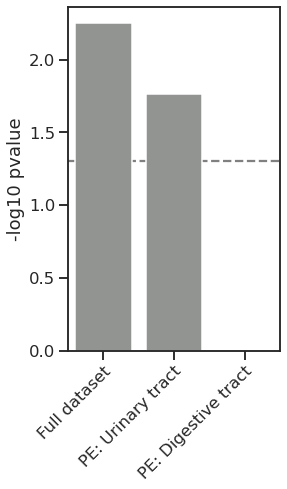

In [79]:
# plot 
cp = sns.catplot(data=ff,
                 dodge=True,
                 legend=None,
                 height=6,
                 aspect=0.8,
                 kind='bar',
                 x='type', y='-log pvalue',
                 palette=['xkcd:grey'])
for ax in cp.axes_dict.values():
    ax.axvline(1, color='grey', ls='dashed', zorder=0)
cp.set_xlabels('')
cp.set_ylabels('-log10 pvalue')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
sns.despine(top=False,
            right=False)
plt.axhline(-np.log10(0.05), color='grey', ls='dashed', zorder=0)

plt.savefig('../../out/figures/amr_all.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/amr_all.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

_________________________

**For each AMR gene category**

In [38]:
amr.to_csv('../../out/amr_categ.csv', sep='\t', index=None)

### WG

In [80]:
amr_pangenome

,qseqid,sseqid,pident,qlen,slen,length,nident,gene_id,AMP,TZP,CTX/CAZ,FEP,CARB,GEN,AMK,FQ,SXT1,STX2
2,resfinder~~~aac(3)-IIa_1~~~X51534~~~Gentamicin...,yokD,99.768,861,861,861,859,aac(3)-IIa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,resfinder~~~aac(3)-IIa_1~~~X51534~~~Gentamicin...,group_23626,98.485,861,156,132,130,aac(3)-IIa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,resfinder~~~aac(3)-IIa_2~~~AY138987~~~Gentamic...,yokD,99.652,861,861,861,858,aac(3)-IIa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,resfinder~~~aac(3)-IIa_2~~~AY138987~~~Gentamic...,group_23626,98.485,861,156,132,130,aac(3)-IIa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,resfinder~~~aac(3)-IIa_3~~~X13543~~~Gentamicin...,yokD,96.167,861,861,861,828,aac(3)-IIa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,resfinder~~~sul2_8~~~AJ877041~~~Sulfamethoxazole,folP_3~~~folP_2,99.877,852,816,815,814,sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1925,resfinder~~~sul2_8~~~AJ877041~~~Sulfamethoxazole,folP_2,99.877,852,816,815,814,sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1926,resfinder~~~sul2_9~~~FJ197818~~~Sulfamethoxazole,folP_3~~~folP_2,100.000,852,816,815,815,sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1927,resfinder~~~sul2_9~~~FJ197818~~~Sulfamethoxazole,folP_2,100.000,852,816,815,815,sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [83]:
category = ['AMP', 'TZP', 'CTX/CAZ', 'FEP', 'CARB', 'GEN', 'AMK', 'FQ', 'SXT1', 'STX2']

In [125]:
res = []
for categ in category:
    pop_c = m[m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
    pop_n = m[~m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]

    study_c = f[f['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
    study_n = f[~f['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]

    table = [[study_c, pop_c],
             [study_n, pop_n]]
    odds_ratio, pvalue = stats.fisher_exact(table, alternative='greater')
        
    # empirical
    ratios = []
    for _ in range(100):
        pop_c = m[m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        pop_n = m[~m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        
        r = m.sample(f.shape[0])
        study_r_c = r[r['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        study_r_n = r[~r['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        
        table = [[study_r_c, pop_c],
                 [study_r_n, pop_n]]
        ratios.append(stats.fisher_exact(table, alternative='greater')[0])

    zscores = stats.zscore(ratios + [odds_ratio])
    pvalues = stats.norm.sf(abs(zscores))
    qvalues = sm.stats.multipletests(pvalues, alpha=0.05, method='fdr_bh')[1]
    
    res.append((categ, pvalue, qvalues[-1]))

r = pd.DataFrame(res,
                 columns=['AMR category', 'pvalue', 'empirical-qvalue'])

In [126]:
r

,AMR category,pvalue,empirical-qvalue
0,AMP,1.0,NaN
1,TZP,1.0,NaN
2,CTX/CAZ,1.0,NaN
3,FEP,1.0,NaN
4,CARB,1.0,NaN
5,GEN,1.0,NaN
6,AMK,1.0,NaN
7,FQ,1.0,NaN
8,SXT1,1.0,NaN
9,STX2,1.0,NaN


In [ ]:
r['qvalue'] = sm.stats.multipletests(r['pvalue'], alpha=0.05, method='fdr_bh')[1]
r = r[['AMR category', 'pvalue', 'qvalue', 'empirical-qvalue']]

In [ ]:
r

### PEU

In [127]:
res = []
for categ in category:
    pop_c = m[m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
    pop_n = m[~m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]

    study_c = u[u['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
    study_n = u[~u['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]

    table = [[study_c, pop_c],
             [study_n, pop_n]]
    odds_ratio, pvalue = stats.fisher_exact(table, alternative='greater')
        
    # empirical
    ratios = []
    for _ in range(100):
        pop_c = m[m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        pop_n = m[~m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        
        r = m.sample(u.shape[0])
        study_r_c = r[r['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        study_r_n = r[~r['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        
        table = [[study_r_c, pop_c],
                 [study_r_n, pop_n]]
        ratios.append(stats.fisher_exact(table, alternative='greater')[0])

    zscores = stats.zscore(ratios + [odds_ratio])
    pvalues = stats.norm.sf(abs(zscores))
    qvalues = sm.stats.multipletests(pvalues, alpha=0.05, method='fdr_bh')[1]
    
    res.append((categ, pvalue, qvalues[-1]))

r = pd.DataFrame(res,
                 columns=['AMR category', 'pvalue', 'empirical-qvalue'])

In [128]:
r

,AMR category,pvalue,empirical-qvalue
0,AMP,1.000000,NaN
1,TZP,1.000000,NaN
2,CTX/CAZ,1.000000,NaN
3,FEP,1.000000,NaN
4,CARB,1.000000,NaN
5,GEN,1.000000,NaN
6,AMK,1.000000,NaN
7,FQ,1.000000,NaN
8,SXT1,0.017116,NaN
9,STX2,1.000000,NaN


### PED

In [129]:
res = []
for categ in category:
    pop_c = m[m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
    pop_n = m[~m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]

    study_c = d[d['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
    study_n = d[~d['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]

    table = [[study_c, pop_c],
             [study_n, pop_n]]
    odds_ratio, pvalue = stats.fisher_exact(table, alternative='greater')
        
    # empirical
    ratios = []
    for _ in range(100):
        pop_c = m[m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        pop_n = m[~m['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        
        r = m.sample(d.shape[0])
        study_r_c = r[r['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        study_r_n = r[~r['query'].isin(amr_pangenome[amr_pangenome[categ] != 0]['sseqid'])].shape[0]
        
        table = [[study_r_c, pop_c],
                 [study_r_n, pop_n]]
        ratios.append(stats.fisher_exact(table, alternative='greater')[0])

    zscores = stats.zscore(ratios + [odds_ratio])
    pvalues = stats.norm.sf(abs(zscores))
    qvalues = sm.stats.multipletests(pvalues, alpha=0.05, method='fdr_bh')[1]
    
    res.append((categ, pvalue, qvalues[-1]))

r = pd.DataFrame(res,
                 columns=['AMR category', 'pvalue', 'empirical-qvalue'])

In [130]:
r

,AMR category,pvalue,empirical-qvalue
0,AMP,1.0,NaN
1,TZP,1.0,NaN
2,CTX/CAZ,1.0,NaN
3,FEP,1.0,NaN
4,CARB,1.0,NaN
5,GEN,1.0,NaN
6,AMK,1.0,NaN
7,FQ,1.0,NaN
8,SXT1,1.0,NaN
9,STX2,1.0,NaN
